# Importing Libraries and Data

In [1]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks
!pip install textblob

     -------------------------------------- 64.4/64.4 kB 433.4 kB/s eta 0:00:00
     -------------------------------------- 81.7/81.7 kB 253.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=3a0e8394d0b8a194307282225ab9958fee46b8c20554e10ef3f613d87dc2adfc
  Stored in directory: c:\users\win revans\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks
     ------------------------------------ 636.8/636.8 kB 233.2 kB/s eta 0:00:00


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot

In [70]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [71]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [72]:
df.drop(["Clothing ID", "Title"], axis=1, inplace=True)
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Data Cleaning and Preparation

In [73]:
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [74]:
df.dropna(subset=["Review Text", "Division Name"], inplace=True)

In [75]:
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [76]:
df["Review Text"].tolist()

['Absolutely wonderful - silky and sexy and comfortable',
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
 "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments

# Text Cleaning

In [77]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [78]:
def decontracted(x):
    if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [79]:
df["Review Text"] = df["Review Text"].apply(lambda x: decontracted(x))

In [80]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [81]:
punctuation = '"#$%&\'()*+-/:;<=>?@[\\]^_`{|}~'
numbers = "0123456789"

def clean_text(text):
    clean_list = [x for x in text if x not in punctuation]
    clean_list = [x for x in clean_list if x not in numbers]
    clean_list = [x.lower() for x in clean_list]
    cleaned_text = ''.join(clean_list)
    return cleaned_text

In [82]:
df["Review Text"] = df["Review Text"].apply(clean_text)
df["Review Text"].tolist()

['absolutely wonderful  silky and sexy and comfortable',
 'love this dress!  it is sooo pretty.  i happened to find it in a store, and im glad i did bc i never would have ordered it online bc it is petite.  i bought a petite and am .  i love the length on me hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'i had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small my usual size but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap net over layers. imo, a major design flaw was the net over layer sewn directly into the zipper  it c',
 'i love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!',
 'this sh

# Feature Engineering

In [83]:
from textblob import TextBlob
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates
1,34,love this dress! it is sooo pretty. i happen...,5,1,4,General,Dresses,Dresses
2,60,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"i love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants
4,47,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [84]:
df["Polarity"] = df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Review Length"] = df["Review Text"].apply(lambda x: len(x))
df["Word Count"] = df["Review Text"].apply(lambda x: len(x.split()))

In [85]:
def average_word_length(x):
    words = x.split()
    word_length = 0
    for word in words:
        word_length += len(word)
        
    return word_length/len(words)

In [86]:
df["Average Word Length"] = df["Review Text"].apply(lambda x: average_word_length(x))

In [87]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Review Length,Word Count,Average Word Length
0,33,absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,0.633333,52,7,6.428571
1,34,love this dress! it is sooo pretty. i happen...,5,1,4,General,Dresses,Dresses,0.339583,299,64,3.609375
2,60,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,495,97,4.103093
3,50,"i love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,0.550000,125,23,4.478261
4,47,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,192,36,4.361111


# Data Visualization

In [88]:
df["Polarity"].iplot(kind="hist", colors="blue", bins=50,
                    xTitle = "Sentiment Polarity",
                    yTitle = "Count",
                    title = "Sentiment Polarity Distribution")

We can see that there is a normal distribution centered around 0.175 polarity. Most of the reviews were positive, and a small fraction was negative. Now let's explore the distribution of review ratings (how good or bad were the reviews exactly?) and the reviewers age (do certain age groups tend to have a better opinion of our clothes?)

In [89]:
df["Age"].iplot(kind="hist", colors="red", bins=50,
                xTitle = "Age",
                yTitle = "Count",
                title = "Age Distribution",
                linecolor = 'black')

From this, we can tell that the median of our age groups is around 38 years old, with younger people constituting to a larger proportion of our customers. However, a sizeable amount of customers still come from age 40+.

<AxesSubplot:ylabel='Rating'>

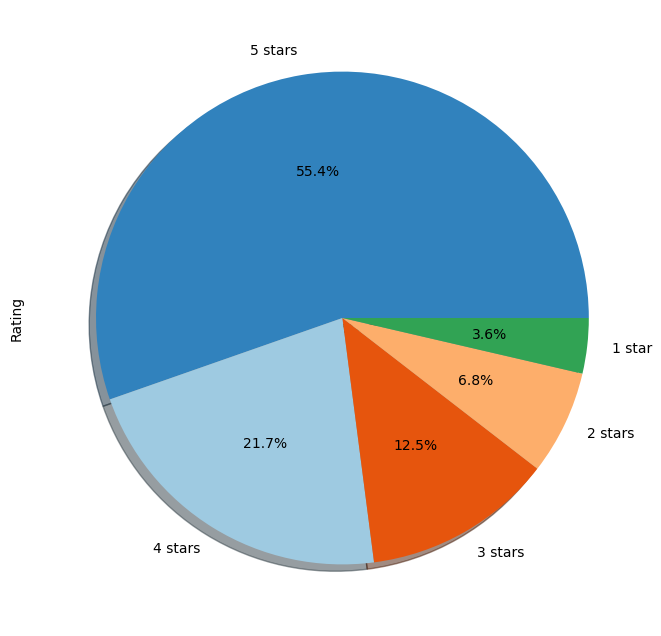

In [90]:
plt.figure(figsize=(8,8))
labels = ["5 stars", "4 stars", "3 stars", "2 stars", "1 star"]
cmap = plt.get_cmap("tab20c")
df["Rating"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, labels=labels, colors = cmap(np.arange(5)*2))

C:\Users\Win Revans\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



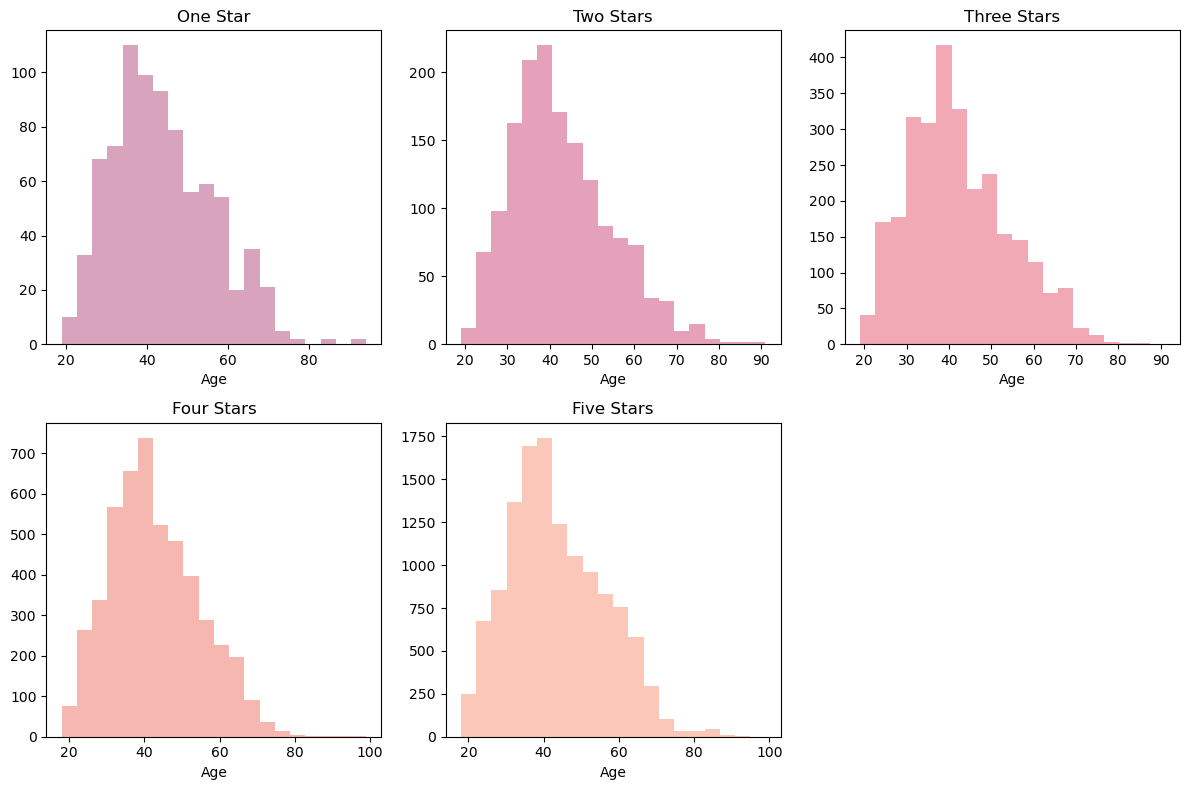

In [91]:
rocket = plt.get_cmap("rocket")
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12, 8))
one = df[df["Rating"] == 1]["Age"]
two = df[df["Rating"] == 2]["Age"]
three = df[df["Rating"] == 3]["Age"]
four = df[df["Rating"] == 4]["Age"]
five = df[df["Rating"] == 5]["Age"]

ax1 = sns.distplot(one, ax=axes[0][0], kde=False, bins=20, color=rocket(100))
ax1.set_title('One Star')

ax2 = sns.distplot(two, ax=axes[0][1], kde=False, bins=20, color=rocket(120))
ax2.set_title('Two Stars')

ax3 = sns.distplot(three, ax=axes[0][2], kde=False, bins=20, color=rocket(140))
ax3.set_title('Three Stars')

ax4 = sns.distplot(four, ax=axes[1][0], kde=False, bins=20, color=rocket(160))
ax4.set_title('Four Stars')

ax5 = sns.distplot(five, ax=axes[1][1], kde=False, bins=20, color=rocket(180))
ax5.set_title('Five Stars')

axes[-1, -1].axis("off")

plt.tight_layout()

# Analyzing Engineered Features

In [92]:
df["Review Length"].iplot(kind="hist", colors="green",
                          xTitle = 'Review Length',
                          yTitle = "Count",
                          title = "Review Length Distribution")

In [93]:
df["Word Count"].iplot(kind="hist", colors="#B6E880",
                          xTitle = 'Review Length',
                          yTitle = "Count",
                          title = "Review Length Distribution")

# Distribution of Department, Division and Class

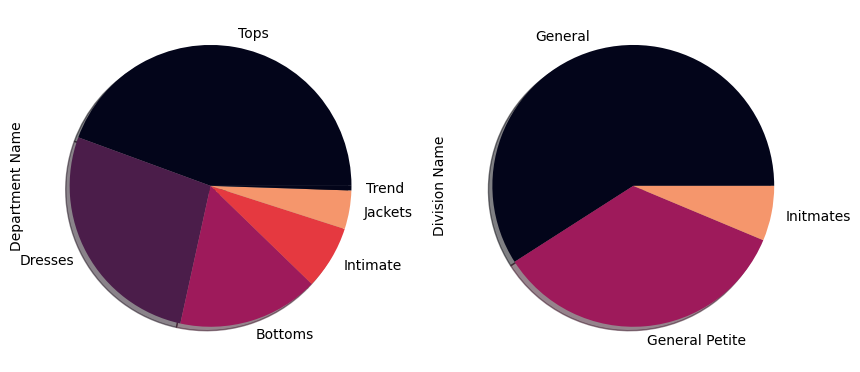

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
ax=df["Department Name"].value_counts().plot.pie(ax = axes[0], shadow=True, colors=rocket(np.arange(5)*50))
ax1=df["Division Name"].value_counts().plot.pie(ax = axes[1], shadow=True, colors=rocket(np.arange(5)*100))

In [95]:
df["Class Name"].value_counts().iplot(kind="bar", colors='rgb(95, 70, 144)',
                                           xTitle = 'Class',
                                           yTitle = "Count",
                                           title = "Class Distribution")

# Unigram, Bigram and Trigram Analysis

In [96]:
x = ["This is a list of words, which are words that are in a list."]

In [97]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer().fit(x)
bag_of_words = vectorizer.transform(x)
sum_of_words = bag_of_words.sum(axis=0)
word_frequency = [(key, sum_of_words[0, value]) for key, value in vectorizer.vocabulary_.items()]
word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
word_frequency

[('list', 2),
 ('words', 2),
 ('are', 2),
 ('this', 1),
 ('is', 1),
 ('of', 1),
 ('which', 1),
 ('that', 1),
 ('in', 1)]

And if we want the top 5 words:

In [98]:
word_frequency[:5]

[('list', 2), ('words', 2), ('are', 2), ('this', 1), ('is', 1)]

Great, now let's put this into a function.

In [99]:
def top_n_words(x, n):
    vectorizer = CountVectorizer().fit(x)
    bag_of_words = vectorizer.transform(x)
    sum_of_words = bag_of_words.sum(axis=0)
    word_frequency = [(key, sum_of_words[0, value]) for key, value in vectorizer.vocabulary_.items()]
    word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]

Let's take a look at our top 20 words in the reviews.

In [100]:
top_n_words(df["Review Text"], 20)

[('the', 76053),
 ('it', 48995),
 ('and', 48903),
 ('is', 38128),
 ('this', 25720),
 ('to', 24440),
 ('in', 20608),
 ('not', 16964),
 ('but', 16508),
 ('on', 15200),
 ('for', 13993),
 ('of', 13420),
 ('was', 12921),
 ('with', 12787),
 ('so', 11966),
 ('my', 11024),
 ('dress', 10503),
 ('that', 10001),
 ('love', 8934),
 ('size', 8711)]

Let's take a look at the top 20 bigrams and trigrams too.

In [101]:
def top_n_bigrams(x, n):
    vectorizer = CountVectorizer(ngram_range=(2,2)).fit(x)
    bag_of_words = vectorizer.transform(x)
    sum_of_words = bag_of_words.sum(axis=0)
    word_frequency = [(key, sum_of_words[0, value]) for key, value in vectorizer.vocabulary_.items()]
    word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]

In [102]:
top_n_bigrams(df["Review Text"], 20)

[('it is', 12468),
 ('in the', 7171),
 ('and the', 5615),
 ('this dress', 4732),
 ('on the', 4334),
 ('of the', 3932),
 ('and it', 3719),
 ('it was', 3280),
 ('this top', 2926),
 ('this is', 2762),
 ('is very', 2728),
 ('the fabric', 2642),
 ('love the', 2638),
 ('did not', 2484),
 ('love this', 2328),
 ('to wear', 2257),
 ('but it', 2185),
 ('the dress', 2179),
 ('is not', 2133),
 ('do not', 2115)]

In [103]:
def top_n_trigrams(x, n):
    vectorizer = CountVectorizer(ngram_range=(3,3)).fit(x)
    bag_of_words = vectorizer.transform(x)
    sum_of_words = bag_of_words.sum(axis=0)
    word_frequency = [(key, sum_of_words[0, value]) for key, value in vectorizer.vocabulary_.items()]
    word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]

In [104]:
top_n_trigrams(df["Review Text"], 20)

[('the fabric is', 1297),
 ('true to size', 1281),
 ('and it is', 1122),
 ('this dress is', 1118),
 ('it is very', 971),
 ('but it is', 919),
 ('it is not', 905),
 ('the material is', 895),
 ('if you are', 733),
 ('in the store', 727),
 ('on the model', 721),
 ('the fit is', 697),
 ('this top is', 672),
 ('the color is', 630),
 ('love this dress', 598),
 ('it is so', 584),
 ('tried it on', 574),
 ('and it was', 549),
 ('in the back', 527),
 ('the dress is', 518)]

In [105]:
def top_n_words(x, n):
    vectorizer = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vectorizer.transform(x)
    sum_of_words = bag_of_words.sum(axis=0)
    word_frequency = [(key, sum_of_words[0, value]) for key, value in vectorizer.vocabulary_.items()]
    word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]

In [106]:
def top_n_bigrams(x, n):
    vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(x)
    bag_of_words = vectorizer.transform(x)
    sum_of_words = bag_of_words.sum(axis=0)
    word_frequency = [(key, sum_of_words[0, value]) for key, value in vectorizer.vocabulary_.items()]
    word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]

In [107]:
def top_n_trigrams(x, n):
    vectorizer = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(x)
    bag_of_words = vectorizer.transform(x)
    sum_of_words = bag_of_words.sum(axis=0)
    word_frequency = [(key, sum_of_words[0, value]) for key, value in vectorizer.vocabulary_.items()]
    word_frequency = sorted(word_frequency, key = lambda x: x[1], reverse=True)
    return word_frequency[:n]

In [108]:
top_unigrams = top_n_words(df["Review Text"], 20)
df_unigrams = pd.DataFrame(top_unigrams)
top_unigrams

[('dress', 10503),
 ('love', 8934),
 ('size', 8711),
 ('fit', 7278),
 ('like', 7005),
 ('wear', 6415),
 ('great', 6100),
 ('just', 5595),
 ('im', 5556),
 ('fabric', 4771),
 ('small', 4568),
 ('color', 4563),
 ('look', 4024),
 ('really', 3922),
 ('ordered', 3835),
 ('little', 3771),
 ('perfect', 3750),
 ('flattering', 3493),
 ('did', 3444),
 ('soft', 3310)]

In [109]:
top_trigrams = top_n_trigrams(df["Review Text"], 20)
df_trigrams = pd.DataFrame(top_trigrams)
top_trigrams

[('fits true size', 274),
 ('fit true size', 223),
 ('runs true size', 144),
 ('love love love', 142),
 ('usually wear size', 135),
 ('ordered usual size', 108),
 ('does run large', 96),
 ('really wanted love', 94),
 ('im glad did', 93),
 ('size fit perfectly', 93),
 ('wanted love dress', 87),
 ('usually wear small', 75),
 ('reference im lbs', 75),
 ('small fit perfectly', 73),
 ('just did work', 71),
 ('fit like glove', 69),
 ('size fits perfectly', 68),
 ('normally wear size', 68),
 ('looks great jeans', 68),
 ('usually wear medium', 67)]

# Building a Sentiment Classifier

In [110]:
positive = (df["Rating"] >= 4)
neutral = (df["Rating"] == 3)
negative = (df["Rating"] < 3)

df["Review Type"] = " "
df["Review Type"][positive] = "Positive"
df["Review Type"][neutral] = "Neutral"
df["Review Type"][negative] = "Negative"

df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Review Length,Word Count,Average Word Length,Review Type
0,33,absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,0.633333,52,7,6.428571,Positive
1,34,love this dress! it is sooo pretty. i happen...,5,1,4,General,Dresses,Dresses,0.339583,299,64,3.609375,Positive
2,60,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,495,97,4.103093,Neutral
3,50,"i love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,0.550000,125,23,4.478261,Positive
4,47,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,192,36,4.361111,Positive


In [111]:
review_type = {"Positive": 2, "Neutral": 1, "Negative": 0}
df["Review Type"] = df["Review Type"].map(review_type)

In [112]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Review Length,Word Count,Average Word Length,Review Type
0,33,absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,0.633333,52,7,6.428571,2
1,34,love this dress! it is sooo pretty. i happen...,5,1,4,General,Dresses,Dresses,0.339583,299,64,3.609375,2
2,60,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,495,97,4.103093,1
3,50,"i love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,0.550000,125,23,4.478261,2
4,47,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,192,36,4.361111,2


In [113]:
X = df.iloc[:, 1].values
y = df.iloc[:, -1].values

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Let's use a unigram vectorizer with no stopwords filtered as a baseline.

In [115]:
vect = CountVectorizer()
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

Now, let's try one of the most well known classifiers for text data, Naive Bayes. But before that, we will create a dummy classifier that predicts the most frequent value as a benchmark.

In [116]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
    
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train_vect, y_train)
y_dummy_predictions = dummy_majority.predict(X_test_vect)
print('Dummy Classifier Accuracy: {:.2f}'.format(accuracy_score(y_test, y_dummy_predictions)))

Dummy Classifier Accuracy: 0.77


In [117]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

MultinomialNB()

In [118]:
y_pred = classifier.predict(X_test_vect)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))

[[ 192  228  182]
 [  84  248  349]
 [  34  177 4163]]
Accuracy: 0.81
Precision: 0.63
Recall: 0.54


In [119]:
vect = CountVectorizer(min_df=3, ngram_range=(1,2))
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [120]:
classifier.fit(X_train_vect, y_train)
y_pred = classifier.predict(X_test_vect)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))

[[ 272  242   88]
 [ 108  356  217]
 [  54  280 4040]]
Accuracy: 0.83
Precision: 0.65
Recall: 0.63


# Modified Sentiment Analysis

In [121]:
df_modified = df[df["Review Type"] != 1]
df_modified.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Review Length,Word Count,Average Word Length,Review Type
0,33,absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates,0.633333,52,7,6.428571,2
1,34,love this dress! it is sooo pretty. i happen...,5,1,4,General,Dresses,Dresses,0.339583,299,64,3.609375,2
3,50,"i love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,0.550000,125,23,4.478261,2
4,47,this shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,192,36,4.361111,2
5,49,"i love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.178750,486,97,4.010309,0


In [122]:
X = df_modified.iloc[:, 1]
y = df_modified.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [123]:
vect = CountVectorizer(min_df=3, ngram_range=(1,2))
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [124]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
    
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train_vect, y_train)
y_dummy_predictions = dummy_majority.predict(X_test_vect)
print('Dummy Classifier Accuracy: {:.2f}'.format(accuracy_score(y_test, y_dummy_predictions)))

Dummy Classifier Accuracy: 0.88


In [125]:
from sklearn.metrics import classification_report
classifier.fit(X_train_vect, y_train)
y_pred = classifier.predict(X_test_vect)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 489  112]
 [ 192 4159]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       601
           2       0.97      0.96      0.96      4351

    accuracy                           0.94      4952
   macro avg       0.85      0.88      0.86      4952
weighted avg       0.94      0.94      0.94      4952



In [127]:
val = ["The dress I ordered looked good online, but disappointing when I received it. Material is not bad but design needs improvement.", 
       "I am very disappointed after use this product."]
classifier.predict(vect.transform(val))

array([0, 0], dtype=int64)